## Exercise 6: Choosing the best performing model on a dataset

Instructions:

- Use the Dataset File to train your model
- Use the Test File to generate your results
- Use the Sample Submission file to generate the same format
- Use all Regression models

Submit your results to:
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview



In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

## Dataset File

In [2]:
train_data = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/3fd7d51ffd17863598ac3f44eeefc558171a5b73/dataset/house-prices-advanced-regression-techniques/train.csv?raw=true'
df = pd.read_csv(train_data)

In [3]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

In [4]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
df = df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC','Fence','MiscFeature', ], axis='columns')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500


## Test File

In [6]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/3fd7d51ffd17863598ac3f44eeefc558171a5b73/dataset/house-prices-advanced-regression-techniques/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [7]:
print("\nDataset information:")
print(dt.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null  

In [8]:
dt.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [9]:
dt = dt.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC','Fence','MiscFeature'], axis='columns')
dt.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal


In [10]:
dt.dropna()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80.0,13384,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,5,2006,WD,Normal
1452,2913,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,12,2006,WD,Abnorml
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [11]:
dt.shape

(1459, 74)

In [12]:
dt.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

In [13]:
dt.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [14]:
dt.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipython-input-3453550780.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


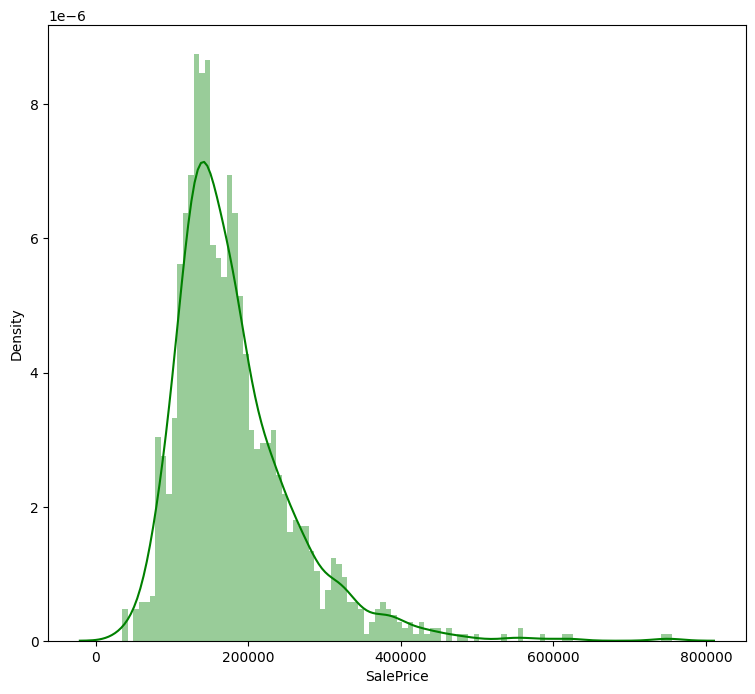

In [15]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

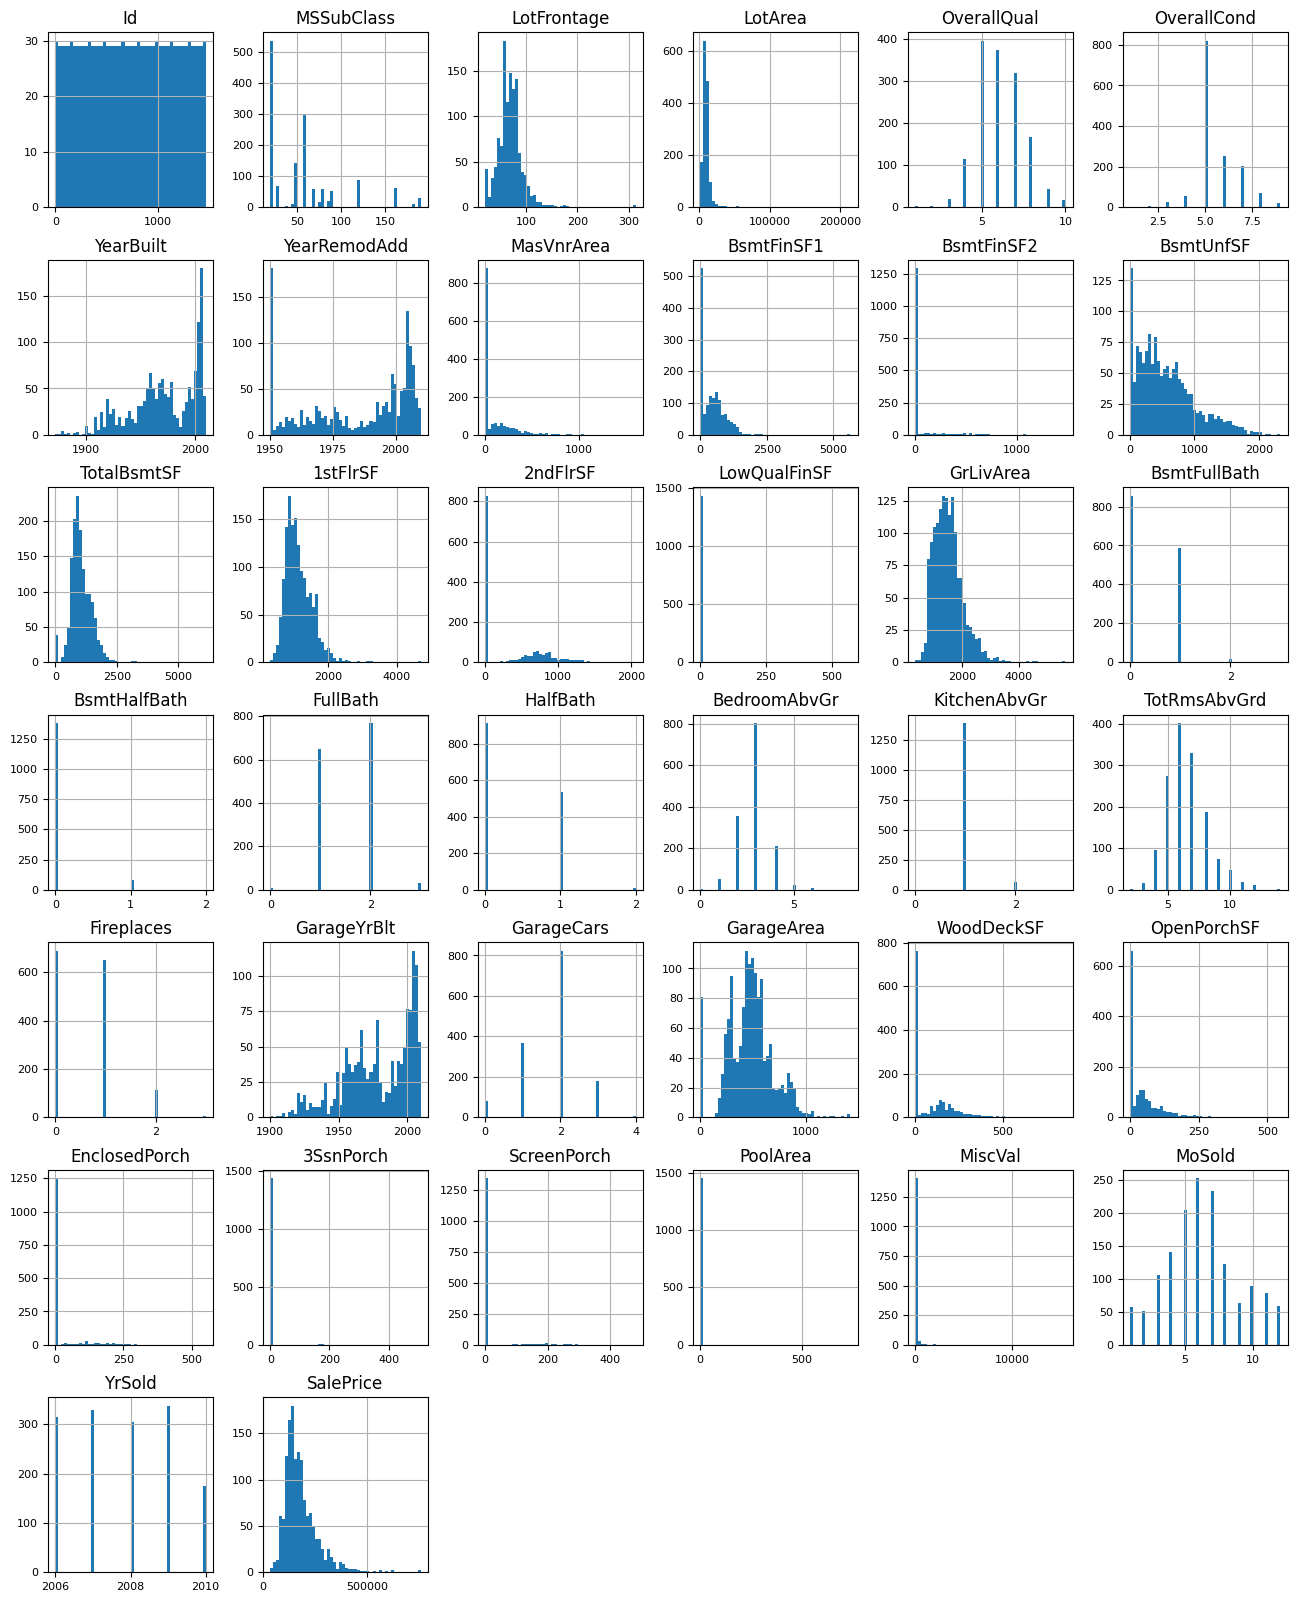

In [16]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

**Splitting the Dataset**

In [17]:
X = df[['MSSubClass',   'LotFrontage',  'LotArea',      'OverallQual',  'OverallCond',  'YearBuilt',    'YearRemodAdd', 'MasVnrArea',   'BsmtFinSF1',   'GarageArea',   'WoodDeckSF',   'OpenPorchSF',  'EnclosedPorch',        '3SsnPorch',    'ScreenPorch',  'PoolArea',     'MiscVal',      'MoSold',       'YrSold']]
y = df['SalePrice']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Sample Submission File

In [20]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/3fd7d51ffd17863598ac3f44eeefc558171a5b73/dataset/house-prices-advanced-regression-techniques/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [21]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


## 1. Train a KNN Regressor

In [22]:
knn = KNeighborsRegressor(n_neighbors=5)

In [23]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with the mean
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn.fit(X_train_imputed, y_train)

KNeighborsRegressor()

In [24]:
y_pred = knn.predict(X_test_imputed)

In [25]:
print("KNN Prediction")
print(y_pred)

KNN Prediction
[145180.  267480.  132805.  136160.  201417.2  98300.  195257.  137400.
  91800.  223800.  127570.  146100.  207180.  151100.  181500.  125200.
 169500.  122680.  114100.  194480.  190220.  167777.  174156.  115400.
 173760.  185600.  164803.  222000.  199100.  165880.  150200.  257454.8
 175880.  121198.  213600.  183900.  114000.  169500.  220580.  168280.
 130780.  133900.  130080.  243602.6 163000.  125400.  162860.  121600.
 354980.4 165030.  131180.  260838.4 150028.  228884.4 138400.  254056.
 173200.  198900.  175000.  102720.  122770.  142960.  235138.  247359.6
 191303.  179910.  119000.  267480.  152400.  172594.6 112023.4  95700.
 127900.  141764.4 364495.6 145200.  222980.  290584.8 138100.  154880.
  94600.  130405.  196900.  117160.  168920.  123280.  227080.  249230.
 138400.  208008.2 187427.  193350.  146480.  179575.  168050.  154375.
 129000.  136600.  193967.4 197880.  212156.  199617.  344780.4 123180.
 224800.  147398.  173000.  168392.  158830.  1

- Perform cross validation

In [26]:
from sklearn.model_selection import cross_val_score

knn_cv_scores = cross_val_score(knn, X_train_imputed, y_train, cv=5)

print(f"KNN Regressor Cross-validation scores: {knn_cv_scores}")
print(f"KNN Regressor Average cross-validation score: {knn_cv_scores.mean()}")

KNN Regressor Cross-validation scores: [0.45326397 0.39935149 0.48055609 0.50207909 0.50546776]
KNN Regressor Average cross-validation score: 0.46814367851814354


## 2. Train a SVM Regression

In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_imputed, y_train)

SVR(kernel='linear')

In [29]:
y_pred_svr = svr_model.predict(X_test_imputed)

- Perform cross validation

In [30]:
from sklearn.model_selection import cross_val_score

svr_cv_scores = cross_val_score(svr_model, X_train_imputed, y_train, cv=5)

print(f"SVM Regressor Cross-validation scores: {svr_cv_scores}")
print(f"SVM Regressor Average cross-validation score: {svr_cv_scores.mean()}")

SVM Regressor Cross-validation scores: [0.62102622 0.4045868  0.60711033 0.61630652 0.66022676]
SVM Regressor Average cross-validation score: 0.5818513247546877


## 3. Train a Decision Tree Regression

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train_imputed, y_train)

DecisionTreeRegressor(random_state=42)

- Perform cross validation

In [32]:
dt_cv_scores = cross_val_score(dtree, X_train_imputed, y_train, cv=5)

print(f"Decision Tree Regressor Cross-validation scores: {dt_cv_scores}")
print(f"Decision Tree Regressor Average cross-validation score: {dt_cv_scores.mean()}")

Decision Tree Regressor Cross-validation scores: [0.52106604 0.25718429 0.55158825 0.58229887 0.58011843]
Decision Tree Regressor Average cross-validation score: 0.49845117659384097


## 4. Train a Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [34]:
from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(rf_model, X_train_imputed, y_train, cv=5)

print(f"Random Forest Regressor Cross-validation scores: {rf_cv_scores}")
print(f"Random Forest Regressor Average cross-validation score: {rf_cv_scores.mean()}")

Random Forest Regressor Cross-validation scores: [0.73564609 0.58371183 0.76770538 0.78909374 0.78753135]
Random Forest Regressor Average cross-validation score: 0.7327376759246602


## 5. Compare all the performance of all regression models


KNN Regressor Average cross-validation score: 0.46814367851814354

SVM Regressor Average cross-validation score: 0.5818513247546877

Decision Tree Regressor Average cross-validation score: 0.49845117659384097

Random Forest Regressor Average cross-validation score: 0.7327376759246602

## 6. Generate Submission File

Choose the model that has the best performance to generate a submission file.

In [36]:
best_model = rf_model

In [41]:
# Impute missing values in the test data using the imputer fitted on the training data
X_test_submission_imputed = imputer.transform(dt[['MSSubClass',   'LotFrontage',  'LotArea',      'OverallQual',  'OverallCond',  'YearBuilt',    'YearRemodAdd', 'MasVnrArea',   'BsmtFinSF1',   'GarageArea',   'WoodDeckSF',   'OpenPorchSF',  'EnclosedPorch',        '3SsnPorch',    'ScreenPorch',  'PoolArea',     'MiscVal',      'MoSold',       'YrSold']])

# Use the best performing model (Random Forest) to make predictions
y_pred_submission = best_model.predict(X_test_submission_imputed)

In [42]:
submission_df = pd.DataFrame({
    'Id': dt['Id'],
    'SalePrice': y_pred_submission
})

In [43]:
submission_df.to_csv('submission_file.csv', index=False)

print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
